In [161]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [162]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [163]:
print(df_test.shape, df_train.shape)

(418, 11) (891, 12)


In [164]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [165]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
# it gives the percentage of the each missing column
df_train.isnull().sum()/df_train.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)
    DEPRECATED
    
    This function has been deprecated and will be removed in seaborn v0.14.0.
    It has been replaced by :func:`histplot` and :func:`displot`, two functions
    with a modern API and many more capabilities.
    
    For a guide to updating, please see this notebook:
    
    https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='Age', ylabel='Density'>

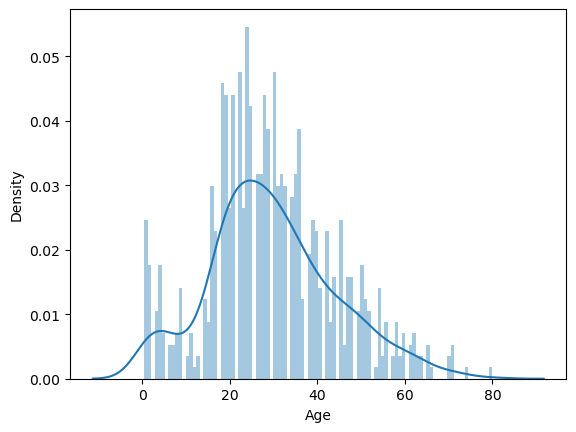

In [169]:
sns.distplot(df_train['Age'], bins=100)

In [170]:
print("Mean "+str(df_train['Age'].mean())+"\nMedian "+str(df_train['Age'].median()) )

Mean 29.69911764705882
Median 28.0


In [171]:
# drop 'Cabin'
# we have two null columns. we can either delete this row or set the median (or) mean #print(df_train['Embarked'].isnull().sum() )
if 'Embarked' in df_train.columns:
    df_train = df_train[~df_train['Embarked'].isnull()]

df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Minor'] = df_train['Age'].apply(lambda x: 1 if x <= 16 else 0)

if((df_train['Sex'] == 'male').sum()  > 0):
    df_train['Sex'] = df_train['Sex'].map({'male':1, 'female':0})
    
if 'Parch' in df_train.columns:
    df_train['Alone'] = df_train['Parch'] + df_train['SibSp']
    df_train['Alone'] = df_train['Alone'].apply(lambda x: 1 if x == 0 else 0)
if 'Embarked' in df_train.columns:
    cat_cols = ['Embarked', 'Pclass']
    df_train = pd.get_dummies(df_train, columns=cat_cols, dtype=int)
    
df_train.drop(['Cabin','PassengerId', 'Name', 'Ticket', 'Parch', 'SibSp'], inplace=True, axis=1,  errors='ignore')

In [172]:
# it gives the percentage of the each missing column
df_train.isnull().sum()/df_train.shape[0] * 100

Survived      0.0
Sex           0.0
Age           0.0
Fare          0.0
Minor         0.0
Alone         0.0
Embarked_C    0.0
Embarked_Q    0.0
Embarked_S    0.0
Pclass_1      0.0
Pclass_2      0.0
Pclass_3      0.0
dtype: float64

In [173]:
#doing same for df_test

In [174]:
# it gives the percentage of the each missing column
df_test.isnull().sum()/df_test.shape[0] * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [175]:
# drop 'Cabin'
# we have two null columns. we can either delete this row or set the median (or) mean #print(df_train['Embarked'].isnull().sum() )
if 'Embarked' in df_test.columns:
    df_test = df_test[~df_test['Embarked'].isnull()]

df_test['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Minor'] = df_test['Age'].apply(lambda x: 1 if x <= 16 else 0)
df_test['Fare'].fillna(df_train['Fare'].mean(), inplace=True)

if((df_test['Sex'] == 'male').sum()  > 0):
    df_test['Sex'] = df_test['Sex'].map({'male':1, 'female':0})
    
if 'Parch' in df_test.columns:
    df_test['Alone'] = df_test['Parch'] + df_test['SibSp']
    df_test['Alone'] = df_test['Alone'].apply(lambda x: 1 if x == 0 else 0)
if 'Embarked' in df_test.columns:
    cat_cols = ['Embarked', 'Pclass']
    df_test = pd.get_dummies(df_test, columns=cat_cols, dtype=int)
    
df_test.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp'], inplace=True, axis=1,  errors='ignore')

In [176]:
# it gives the percentage of the each missing column
df_test.isnull().sum()/df_test.shape[0] * 100

PassengerId    0.0
Sex            0.0
Age            0.0
Fare           0.0
Minor          0.0
Alone          0.0
Embarked_C     0.0
Embarked_Q     0.0
Embarked_S     0.0
Pclass_1       0.0
Pclass_2       0.0
Pclass_3       0.0
dtype: float64

In [177]:
df_test.head()

,PassengerId,Sex,Age,Fare,Minor,Alone,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,1,34.5,7.8292,0,1,0,1,0,0,0,1
1,893,0,47.0,7.0000,0,0,0,0,1,0,0,1
2,894,1,62.0,9.6875,0,1,0,1,0,0,1,0
3,895,1,27.0,8.6625,0,1,0,0,1,0,0,1
4,896,0,22.0,12.2875,0,0,0,0,1,0,0,1


In [178]:
df_train.head()

,Survived,Sex,Age,Fare,Minor,Alone,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,7.2500,0,0,0,0,1,0,0,1
1,1,0,38.0,71.2833,0,0,1,0,0,1,0,0
2,1,0,26.0,7.9250,0,1,0,0,1,0,0,1
3,1,0,35.0,53.1000,0,0,0,0,1,1,0,0
4,0,1,35.0,8.0500,0,1,0,0,1,0,0,1


In [179]:
print(df_test.shape, df_train.shape)

(418, 12) (889, 12)


<Axes: >

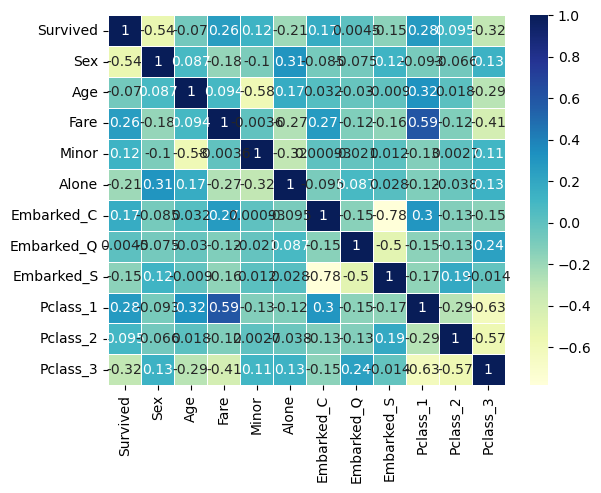

In [180]:
sns.heatmap( df_train.corr(), annot = True, cmap='YlGnBu', linewidths=.5)

In [181]:
y_train = df_train.pop('Survived')
X_train = df_train
#y_test = df_test.pop('Survived')
X_test = df_test

In [182]:
print(y_train.shape, X_train.shape, X_test.shape)

(889,) (889, 11) (418, 12)


In [183]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [184]:
num_cols = ['Age', 'Fare']
scaler = MinMaxScaler()
scaler.fit(df_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [185]:
loglr = LogisticRegression()
loglr.fit(X_train, y_train)
rfe = RFE(loglr)
rfe = rfe.fit(X_train, y_train)

In [186]:
print("Selected\t\t: ", X_train.columns[rfe.support_])
print("Rejected\t\t: ", X_train.columns[~rfe.support_])

Selected		:  Index(['Sex', 'Age', 'Minor', 'Pclass_1', 'Pclass_3'], dtype='object')
Rejected		:  Index(['Fare', 'Alone', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_2'], dtype='object')


In [198]:
## Accuracy
y_train_pred_prob = rfe.predict_proba(X_train)
#y_train_pred = np.where(y_train_pred_prob[:,0]<0.1, 0, 1)
y_train_pred = np.where(y_train_pred_prob[:,1]<0.4, 0, 1)
print(accuracy_score(y_train, y_train_pred))
cf = confusion_matrix(y_train, y_train_pred)
print(cf)
TN = cf[0, 0]
FP = cf[0, 1]
FN = cf[1, 0]
TP = cf[1, 1]
print(TN, FP, FN, TP)
accracy = (TP + TN) * 1.0 / (TP + TN + FP + FN)
sensitivity = (TP) * 1.0 / (TP + FN) 
Specificity = (TN) * 1.0 / (TN + FP) 
Precision = (TP) * 1.0 / (TP + FP) 
Recall = (TP) * 1.0 / (TP + FN ) 
print("Accuracy\t\t:", accracy)
print("Sensitivity\t\t:", sensitivity)
print("Specificity\t\t:", Specificity)
print("TPR\t\t\t:", (TP) * 1.0 / (TP + FN) )
print("FPR\t\t\t:", (FP) * 1.0 / (FP + TN ) )
print("Precision\t\t:", Precision )
print("Recall\t\t\t:", Recall)

0.78177727784027
[[425 124]
 [ 70 270]]
425 124 70 270
Accuracy		: 0.78177727784027
Sensitivity		: 0.7941176470588235
Specificity		: 0.7741347905282332
TPR			: 0.7941176470588235
FPR			: 0.22586520947176686
Precision		: 0.6852791878172588
Recall			: 0.7941176470588235


In [188]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

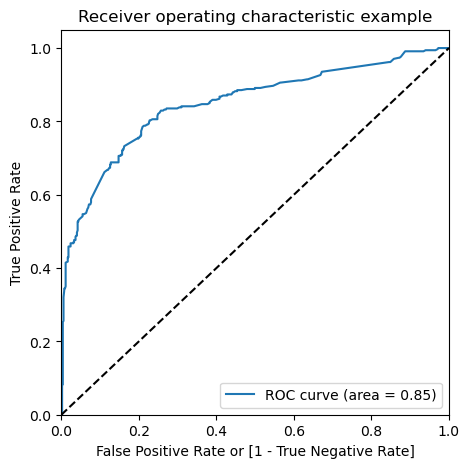

In [189]:
fpr, tpr, thresholds = roc_curve( y_train, y_train_pred_prob[:,1], drop_intermediate = False )
draw_roc(y_train, y_train_pred_prob[:,1])

In [195]:
prob_df = pd.DataFrame(columns=['Prob', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall'])
cnt = 0
for pro in np.arange(0, 1, 0.05):
    ## Accuracy
    y_train_pred_prob = rfe.predict_proba(X_train)
    y_train_pred = np.where(y_train_pred_prob[:,1]<pro, 0, 1)
    #print(accuracy_score(y_train, y_train_pred))
    cf = confusion_matrix(y_train, y_train_pred)
    #print(cf)
    TN = cf[0, 0]
    FP = cf[0, 1]
    FN = cf[1, 0]
    TP = cf[1, 1]
    #print(TN, FP, FN, TP)
    accracy = (TP + TN) * 1.0 / (TP + TN + FP + FN)
    sensitivity = (TP) * 1.0 / (TP + FN) 
    Specificity = (TN) * 1.0 / (TN + FP) 
    Precision = (TP) * 1.0 / (TP + FP) 
    Recall = (TP) * 1.0 / (TP + FN )
    prob_df.loc[cnt] = [pro, accracy, sensitivity, Specificity, Precision, Recall] 
    cnt+=1

In [196]:
prob_df

,Prob,Accuracy,Sensitivity,Specificity,Precision,Recall
0,0.00,0.382452,1.000000,0.000000,0.382452,1.000000
1,0.05,0.385827,1.000000,0.005464,0.383747,1.000000
2,0.10,0.614173,0.905882,0.433515,0.497577,0.905882
3,0.15,0.649044,0.888235,0.500911,0.524306,0.888235
4,0.20,0.680540,0.879412,0.557377,0.551661,0.879412
5,0.25,0.741282,0.841176,0.679417,0.619048,0.841176
6,0.30,0.760405,0.835294,0.714026,0.643991,0.835294
7,0.35,0.776153,0.829412,0.743169,0.666667,0.829412
8,0.40,0.781777,0.794118,0.774135,0.685279,0.794118
9,0.45,0.785152,0.752941,0.805100,0.705234,0.752941


<Axes: xlabel='Prob'>

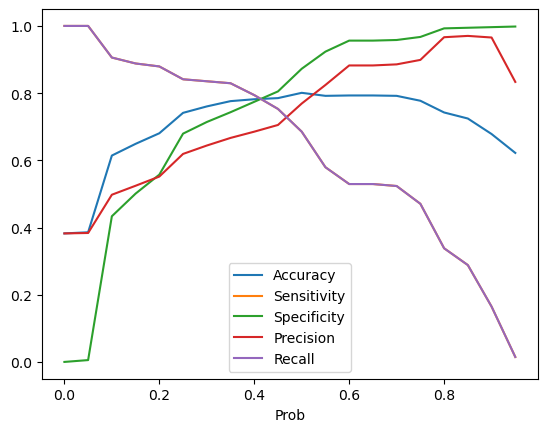

In [199]:
prob_df.plot.line(x='Prob', y=['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall'])

In [215]:
y_test_pred_prob = rfe.predict_proba(X_test.drop('PassengerId', axis=1))
y_test_pred = np.where(y_test_pred_prob[:,1]<0.4, 0, 1)

In [216]:
ans = pd.DataFrame()
ans['Survived'] = y_test_pred
ans['PassengerId'] = X_test['PassengerId']

In [221]:
ans.tail()

,Survived,PassengerId
413,0,1305
414,1,1306
415,0,1307
416,0,1308
417,0,1309


In [222]:
ans.to_csv("submission.csv", index=False)